In [ ]:
!pip install networkx==2.6.3

In [ ]:
!pip install scipy==1.8

# Label Propagation Test

## Create the graph

In [ ]:
# from igraph import *

# node_count = 7

# # Create graph
# g = Graph()

# # Add vertices
# g.add_vertices(node_count)

# for i in range(len(g.vs)):
#     g.vs[i]["id"]= i
#     g.vs[i]["label"]= str(i+1)

# edges = [(0,3), (2,3), (3,4), (4,5), (5,6), (5,1)]

# g.add_edges(edges)

# g.simplify(multiple=True, loops=False, combine_edges=None)

In [ ]:
# out_fig_name = "graph_plot.png"

# visual_style = {}

# # Define colors for nodes
# node_colours = ["red", "green", "grey", "grey", "grey", "grey", "grey"]
# g.vs["color"] = node_colours

# # Set bbox and margin
# visual_style["bbox"] = (500,500)
# visual_style["margin"] = 17

# # # Scale vertices based on degree
# # outdegree = g.outdegree()
# visual_style["vertex_size"] = 25

# # Set vertex lable size
# visual_style["vertex_label_size"] = 8

# # Don't curve the edges
# visual_style["edge_curved"] = False

# # Set the layout
# layout_1 = g.layout_fruchterman_reingold()
# visual_style["layout"] = layout_1

# # Plot the graph
# plot(g, out_fig_name, **visual_style)

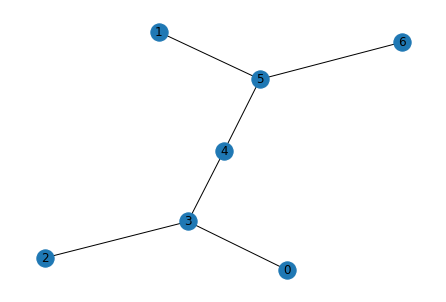

In [1]:
import networkx as nx
import numpy as np
G = nx.Graph()
nodes= [0,1,2,3,4,5,6]
G.add_nodes_from(nodes)
edges = [(0,3), (2,3), (3,4), (4,5), (5,6), (5,1)]
G.add_edges_from(edges)
nx.draw(G, with_labels=True)


In [12]:
A = nx.adjacency_matrix(G).todense()
print(A)
d = A.sum(axis = 1)
print(d)
D = np.diagflat(d)
D

[[0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0]
 [1 0 1 0 1 0 0]
 [0 0 0 1 0 1 0]
 [0 1 0 0 1 0 1]
 [0 0 0 0 0 1 0]]
[[1]
 [1]
 [1]
 [3]
 [2]
 [3]
 [1]]


matrix([[1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 3, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 3, 0],
        [0, 0, 0, 0, 0, 0, 1]])

## Get the degree matrix and its inverse

In [8]:
from numpy.linalg import inv

# D = np.matrix(np.array([[1,0,0,0,0,0,0], [0,1,0,0,0,0,0], [0,0,1,0,0,0,0], [0,0,0,3,0,0,0], [0,0,0,0,2,0,0], [0,0,0,0,0,3,0], [0,0,0,0,0,0,1]]))
Dinv = inv(D)
Dinv

matrix([[1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 1.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.5       ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.33333333, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 1.        ]])

## Get the adjacency matrix

In [26]:
# A = np.matrix(np.array([[1,0,0,0,0,0,0], [0,1,0,0,0,0,0], [0,0,0,1,0,0,0], [1,0,1,0,1,0,0], [0,0,0,1,0,1,0], [0,1,0,0,1,0,1], [0,0,0,0,0,1,0]]))
A

matrix([[1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [1, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 1, 0],
        [0, 1, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 1, 0]])

## Multiply the inverse of D and A

In [13]:
S = Dinv*A
S

matrix([[0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        , 0.        ],
        [0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 0.        ],
        [0.33333333, 0.        , 0.33333333, 0.        , 0.33333333,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.5       , 0.        ,
         0.5       , 0.        ],
        [0.        , 0.33333333, 0.        , 0.        , 0.33333333,
         0.        , 0.33333333],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        , 0.        ]])

# Label Propagation algorithm

In [14]:
import sys

def LabelPropagation(T, Y, diff, max_iter, labelled):
    
    # Initialize
    Y_init = Y
    Y1 = Y
    
    # Initialize convergence parameters
    n=0
    current_diff = sys.maxsize
    
    # Iterate till difference reduces below diff or till the maximum number of iterations is reached
    while current_diff > diff or n < max_iter:
        
        current_diff = 0.0
        # Set Y(t)
        Y0 = Y1
        
        # Calculate Y(t+1)
        Y1 = T*Y0
        
        # Clamp labelled data
        for i in range(Y_init.shape[0]):
            if i in labelled:
                for j in range(Y_init.shape[1]):
                    if i!=j:
                        Y1.A[i][j] = Y_init.A[i][j]
        
        # Get difference between values of Y(t+1) and Y(t)
        for i in range(Y1.shape[0]):
            for j in range(Y1.shape[1]):
                current_diff += abs(Y1.A[i][j] - Y0.A[i][j])
        
        n += 1
        
    return Y1

## Run label propagation

In [15]:
%%time
Y = np.matrix(np.array([[1,0], [0,1], [0,0], [0,0], [0,0], [0,0], [0,0]]))
L = LabelPropagation(S, Y, 0.0001, 100, [0,1])

CPU times: user 10.3 ms, sys: 0 ns, total: 10.3 ms
Wall time: 10.9 ms


## Final label matrix

In [16]:
L

matrix([[1.08927744e-05, 0.00000000e+00],
        [0.00000000e+00, 1.08927744e-05],
        [1.08927744e-05, 4.51193488e-06],
        [0.00000000e+00, 0.00000000e+00],
        [7.70235463e-06, 7.70235463e-06],
        [0.00000000e+00, 0.00000000e+00],
        [4.51193488e-06, 1.08927744e-05]])

## Labels of unlabelled nodes

In [17]:
L.argmax(1)

matrix([[0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1]])